In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/Data LIWC 01 02 23.csv')

# Display the first few rows of the dataframe
print(df.head())


   Sno  X  State       conversation_id  retweet_count  reply_count  \
0    1  1  Assam  S1438213588544409600              0            1   
1    2  2  Assam  S1438437895270846464              0            1   
2    3  3  Assam  S1439558164936941574              0            1   
3    4  4  Assam  S1439920409801945089              0            1   
4    5  5  Assam  S1440221445011898371              0            1   

   like_count  quote_count  Buzz                    id  ...    i we.1 they  \
0           1            0     3  S1438213588544409600  ...  0.0  0.0  0.0   
1           1            0     3  S1438437895270846464  ...  0.0  0.0  0.0   
2           1            0     3  S1439558164936941574  ...  0.0  0.0  0.0   
3           3            0     5  S1439920409801945089  ...  0.0  0.0  0.0   
4           1            0     3  S1440221445011898371  ...  0.0  0.0  0.0   

  insight cause discrep certitude  Positive Negative Total_Sentiment  
0    3.23   0.0    0.00       0.0      

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK data
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Function to preprocess text
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

# Apply preprocessing to the 'Status text' column
df['processed_text'] = df['Status text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment'] = df['processed_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display first few rows to check sentiment scores
print(df[['processed_text', 'sentiment']].head())

# Aggregate sentiment scores by state or other relevant columns
state_sentiment = df.groupby('State')['sentiment'].mean().sort_values()
print(state_sentiment)

                                      processed_text  sentiment
0  world tourism day tourism for inclusive growth...     0.3818
1  in tune with this year s world tourism day the...     0.3818
2  kakoijana reserved forest is loca near abhayap...     0.0000
3  in your next visit to kaziranga national park ...     0.1779
4  ketetong is a singpho tribal village located o...     0.0000
State
Assam          0.403517
Mizoram        0.407903
HP             0.430270
Nagaland       0.449923
Kerala         0.460366
Gujarat        0.468445
J and K        0.490597
Rajasthan      0.493598
Odisha         0.505005
Goa            0.524315
Chattisgarh    0.538152
Delhi          0.541510
Jharkhand      0.556335
Bihar          0.561084
Maharashtra    0.574440
Karnataka      0.585323
MP             0.678908
Name: sentiment, dtype: float64


In [4]:
# Analyze engagement metrics
engagement_metrics = df[['retweet_count', 'reply_count', 'like_count', 'quote_count']].describe()
print(engagement_metrics)

# Find the posts with highest engagement
top_engaged_posts = df.sort_values(by='like_count', ascending=False).head(10)
print(top_engaged_posts[['Status text', 'like_count', 'retweet_count']])

       retweet_count   reply_count    like_count   quote_count
count   14598.000000  14598.000000  14598.000000  14598.000000
mean       21.617276      3.892657    169.190643      1.761748
std        74.558244     39.721953    665.051319     22.132578
min         0.000000      0.000000      0.000000      0.000000
25%         4.000000      0.000000     28.000000      0.000000
50%         9.000000      1.000000     64.000000      1.000000
75%        23.000000      3.000000    156.000000      2.000000
max      3519.000000   4580.000000  38244.000000   2546.000000
                                             Status text  like_count  \
6815   Happy New Air. Share a #changeofair!\r\n\r\nSh...       38244   
6811   The #NewYear is at hand. It’s time to discover...       22368   
10100  Monsoon season rejuvenates nature as nothing e...       20748   
9705   With the highest numbers of tigers, our nation...       19559   
6841   Wear your warm woollen mittens and enjoy the c...       15449   
9

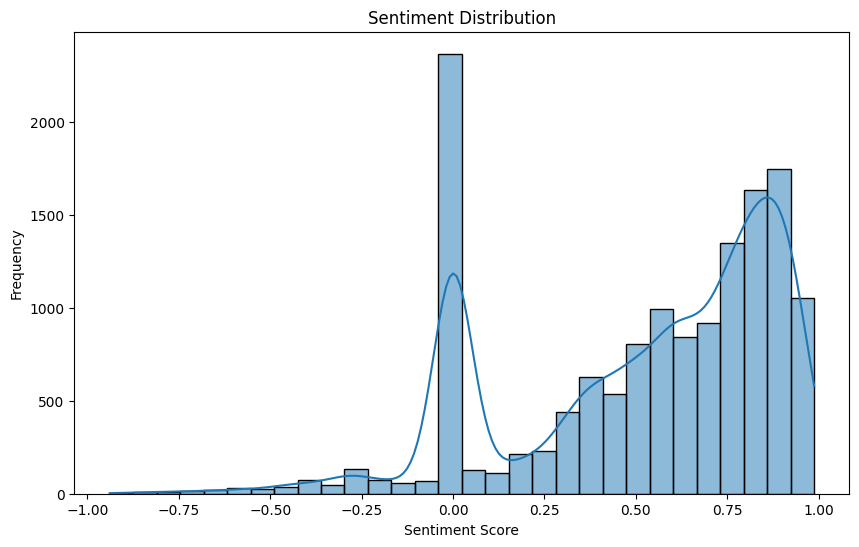

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

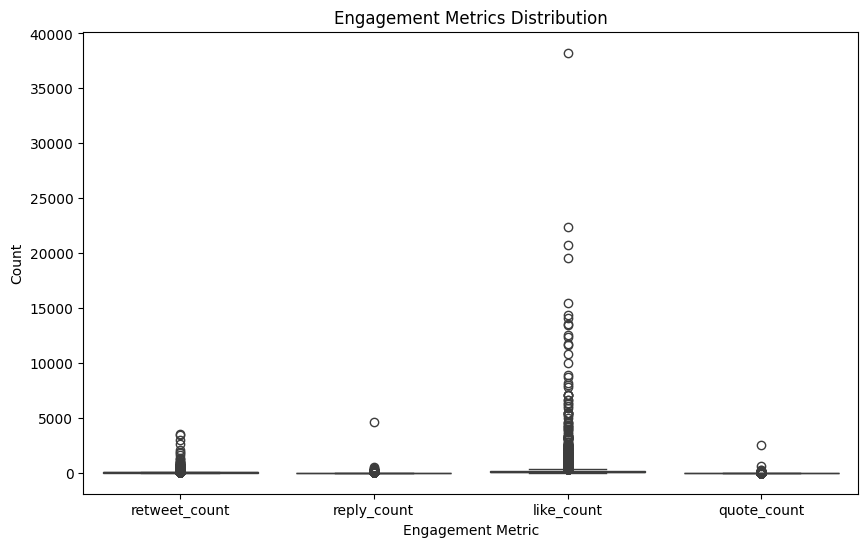

In [6]:
# Plot engagement metrics
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['retweet_count', 'reply_count', 'like_count', 'quote_count']])
plt.title('Engagement Metrics Distribution')
plt.xlabel('Engagement Metric')
plt.ylabel('Count')
plt.show()

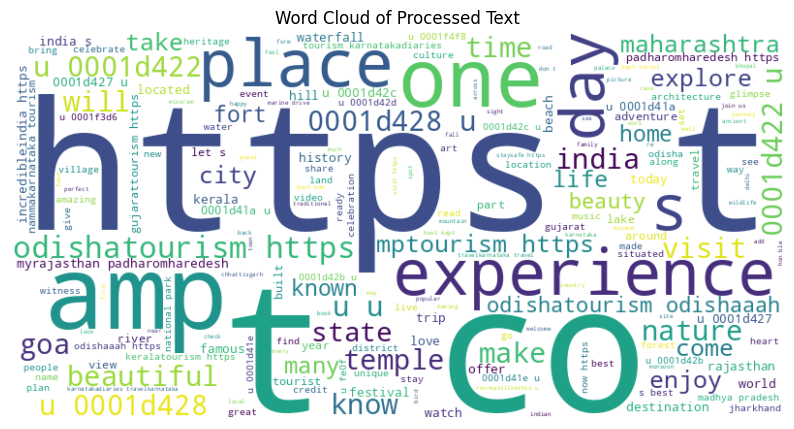

In [7]:
from wordcloud import WordCloud

# Generate word cloud
text = ' '.join(df['processed_text'])
if text.strip():  # Check if the text is not empty
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Processed Text')
    plt.show()
else:
    print("No words to display in word cloud.")